========PYSPARK========
Number of samples: 10
Estimated value of Pi is 3.6
Absolute error is 0.458407346410207
Time taken is 1.3867835998535156 seconds
RAM usage: 6.30%
CPU usage: 11.30%


Number of samples: 100
Estimated value of Pi is 3.28
Absolute error is 0.1384073464102067
Time taken is 0.2715320587158203 seconds
RAM usage: 6.40%
CPU usage: 73.40%


Number of samples: 1000
Estimated value of Pi is 3.144
Absolute error is 0.002407346410207012
Time taken is 0.284930944442749 seconds
RAM usage: 6.60%
CPU usage: 83.10%


Number of samples: 10000
Estimated value of Pi is 3.1492
Absolute error is 0.007607346410206883
Time taken is 0.2425386905670166 seconds
RAM usage: 6.70%
CPU usage: 85.50%


Number of samples: 100000
Estimated value of Pi is 3.15064
Absolute error is 0.009047346410206991
Time taken is 0.2766835689544678 seconds
RAM usage: 6.80%
CPU usage: 82.60%


Number of samples: 1000000
Estimated value of Pi is 3.141532
Absolute error is 6.065358979290281e-05
Time taken is 0.31657

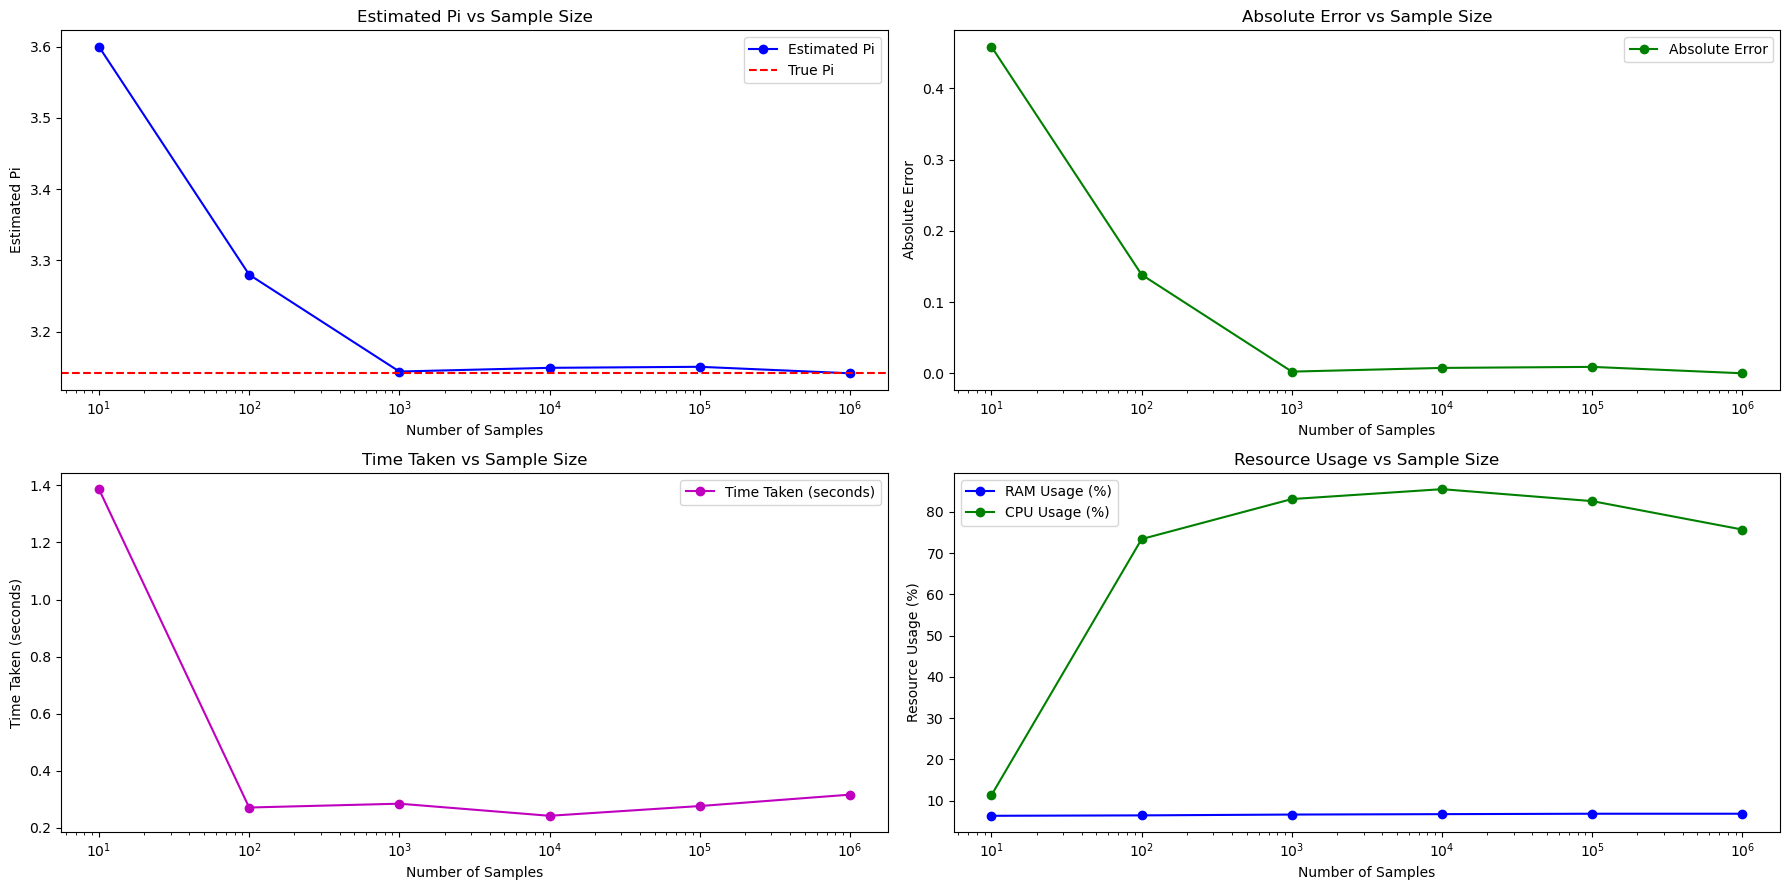

In [1]:
from pyspark import SparkContext, SparkConf
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

def is_point_inside_unit_circle(p):
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

if __name__ == "__main__":
    # Stop any existing SparkContext
    try:
        sc.stop()
    except:
        pass

    # Initialize Spark Context with increased resources
    conf = SparkConf().setAppName("MonteCarloSimulation").set("spark.executor.memory", "4g").set("spark.executor.cores", "2")
    sc = SparkContext(conf=conf)

    # List of different numbers of samples
    sample_sizes = [10, 100,1000, 10000, 100000, 1000000]

    # Lists to store results
    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []
    print("========PYSPARK========")
    # Iterate over different sample sizes
    for num_samples in sample_sizes:
        # Start timing
        start_time = time.time()

        # Distribute the samples across the cluster
        samples = sc.parallelize(range(0, num_samples))

        # Perform the Monte Carlo simulation
        count = samples.filter(is_point_inside_unit_circle).count()

        # Estimate Pi
        pi_estimate = 4 * count / num_samples
        pi_estimates.append(pi_estimate)

        # Known value of Pi
        true_pi = math.pi

        # Calculate the absolute error
        absolute_error = abs(pi_estimate - true_pi)
        absolute_errors.append(absolute_error)

        # End timing
        end_time = time.time()

        # Calculate the time taken
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {pi_estimate}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Stop the Spark Context
    sc.stop()

    # Plotting results
    plt.figure(figsize=(18, 9))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g',label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m',label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


========DASK========
Number of samples: 10
Estimated value of Pi is 2.0
Absolute error is 1.1415926535897931
Time taken is 0.03672456741333008 seconds
RAM usage: 6.60%
CPU usage: 9.30%


Number of samples: 100
Estimated value of Pi is 3.36
Absolute error is 0.21840734641020676
Time taken is 0.07870292663574219 seconds
RAM usage: 6.60%
CPU usage: 6.10%


Number of samples: 1000
Estimated value of Pi is 3.128
Absolute error is 0.013592653589793002
Time taken is 0.08124208450317383 seconds
RAM usage: 6.60%
CPU usage: 25.00%


Number of samples: 10000
Estimated value of Pi is 3.1448
Absolute error is 0.003207346410206924
Time taken is 0.08360028266906738 seconds
RAM usage: 6.60%
CPU usage: 0.00%


Number of samples: 100000
Estimated value of Pi is 3.13932
Absolute error is 0.0022726535897930056
Time taken is 0.08537626266479492 seconds
RAM usage: 6.60%
CPU usage: 33.30%


Number of samples: 1000000
Estimated value of Pi is 3.140852
Absolute error is 0.0007406535897929167
Time taken is 0.22

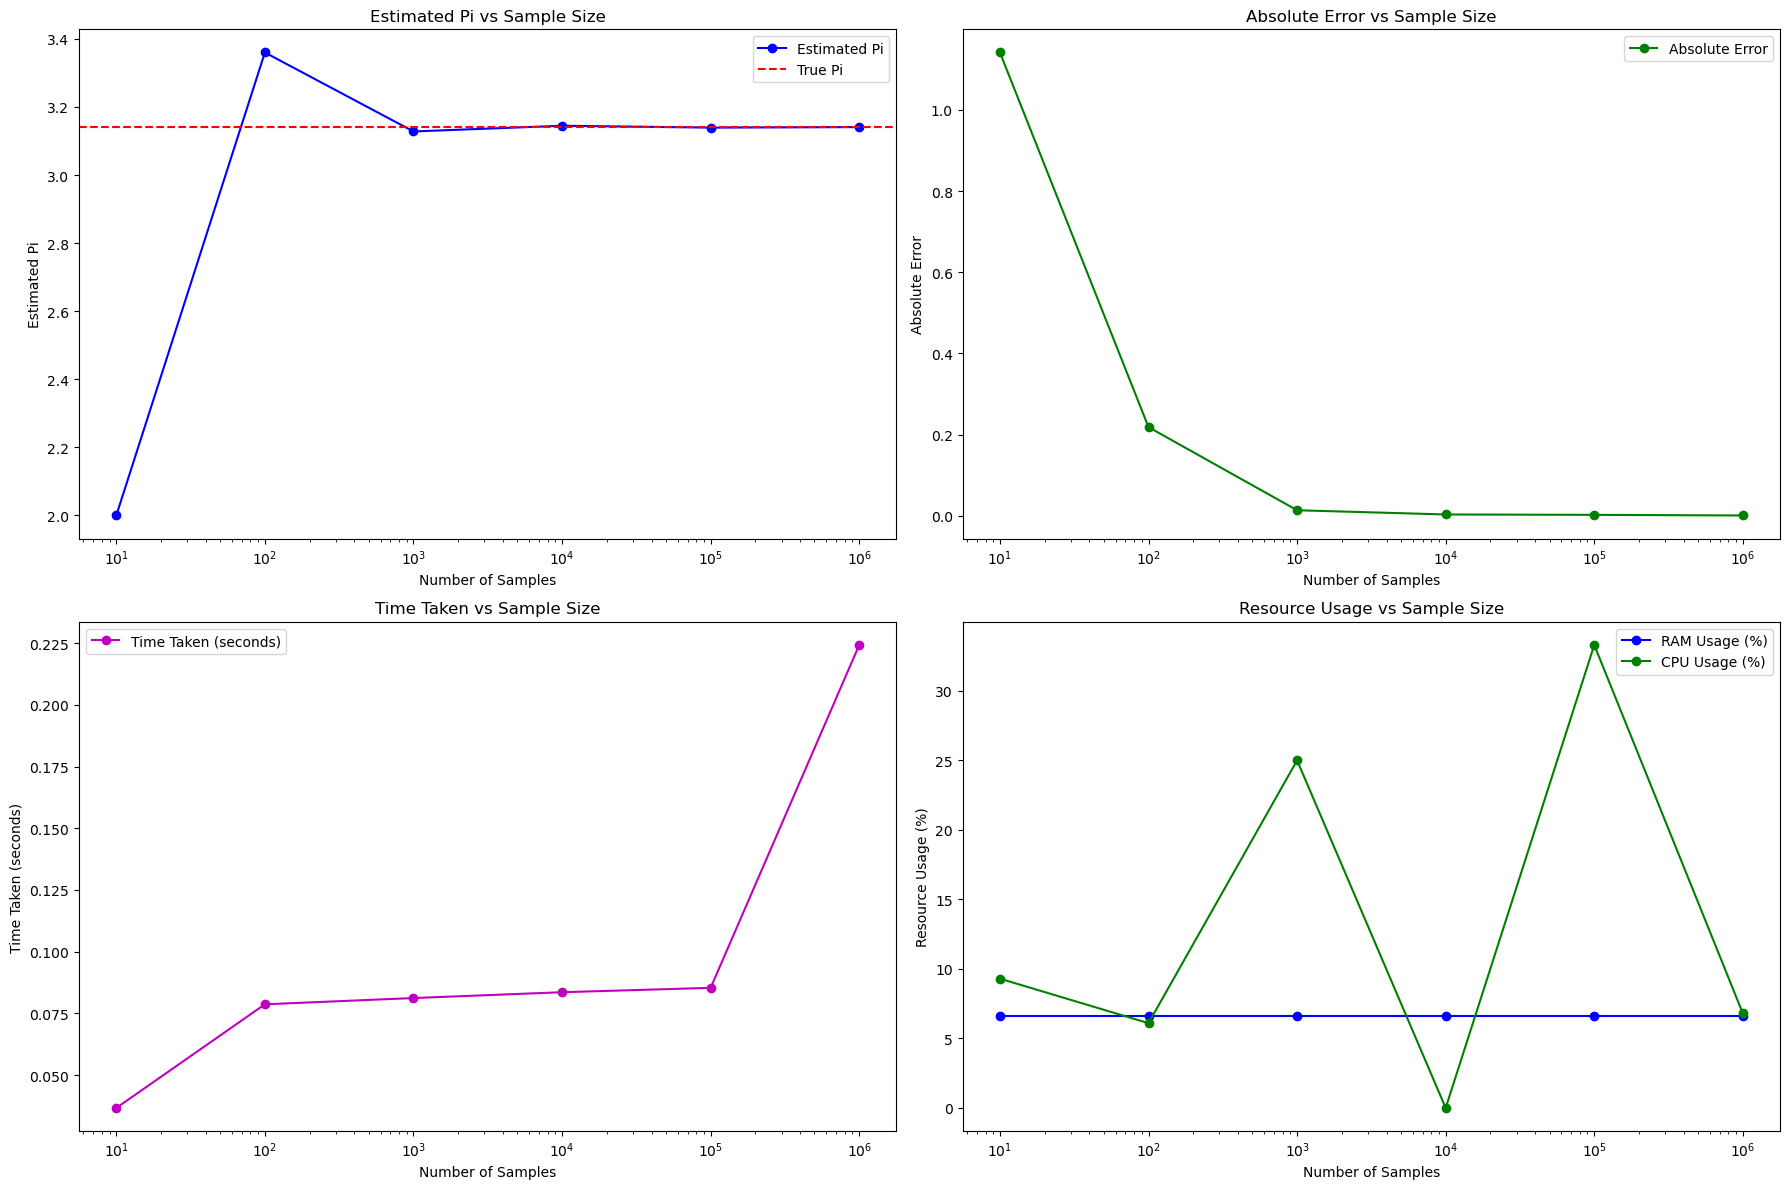

In [2]:
import dask
from dask.distributed import Client, as_completed
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    def is_point_inside_unit_circle(_):
        x, y = random.random(), random.random()
        return x*x + y*y <= 1
    
    counts = [is_point_inside_unit_circle(_) for _ in range(num_samples)]
    count_inside_circle = sum(counts)
    
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    # Dask Client setup
    client = Client()

    sample_sizes = [10, 100,1000, 10000, 100000, 1000000]
    futures = []
    for num_samples in sample_sizes:
        # Scatter the function and arguments to the workers
        future = client.submit(monte_carlo_simulation, num_samples)
        futures.append(future)

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========DASK========")
    # Retrieve results as they complete
    for i, future in enumerate(as_completed(futures)):
        result = future.result()
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {sample_sizes[i]}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Close the Dask client
    client.close()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


2024-07-19 15:46:14,447	WARNING services.py:2010 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=9.82gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2024-07-19 15:46:14,582	INFO worker.py:1788 -- Started a local Ray instance.


========RAY========
Number of samples: 10
Estimated value of Pi is 1.6
Absolute error is 1.541592653589793
Time taken is 0.21163082122802734 seconds
RAM usage: 9.50%
CPU usage: 23.70%


Number of samples: 100
Estimated value of Pi is 3.2
Absolute error is 0.05840734641020706
Time taken is 0.35657334327697754 seconds
RAM usage: 9.70%
CPU usage: 40.20%


Number of samples: 1000
Estimated value of Pi is 3.14
Absolute error is 0.0015926535897929917
Time taken is 0.46382737159729004 seconds
RAM usage: 9.80%
CPU usage: 53.60%


Number of samples: 10000
Estimated value of Pi is 3.1292
Absolute error is 0.012392653589793134
Time taken is 1.7024378776550293 seconds
RAM usage: 10.70%
CPU usage: 50.70%




(is_point_inside_unit_circle pid=29405) :task_na
(is_point_inside_unit_circle pid=29405) me:is_point_inside_unit_circle


Number of samples: 100000
Estimated value of Pi is 3.14056
Absolute error is 0.0010326535897933198
Time taken is 14.501675128936768 seconds
RAM usage: 12.50%
CPU usage: 52.70%


(is_po pid=29412) int_inside_unit_circle
Number of samples: 1000000
Estimated value of Pi is 3.142712
Absolute error is 0.001119346410206834
Time taken is 165.14101243019104 seconds
RAM usage: 22.30%
CPU usage: 44.40%




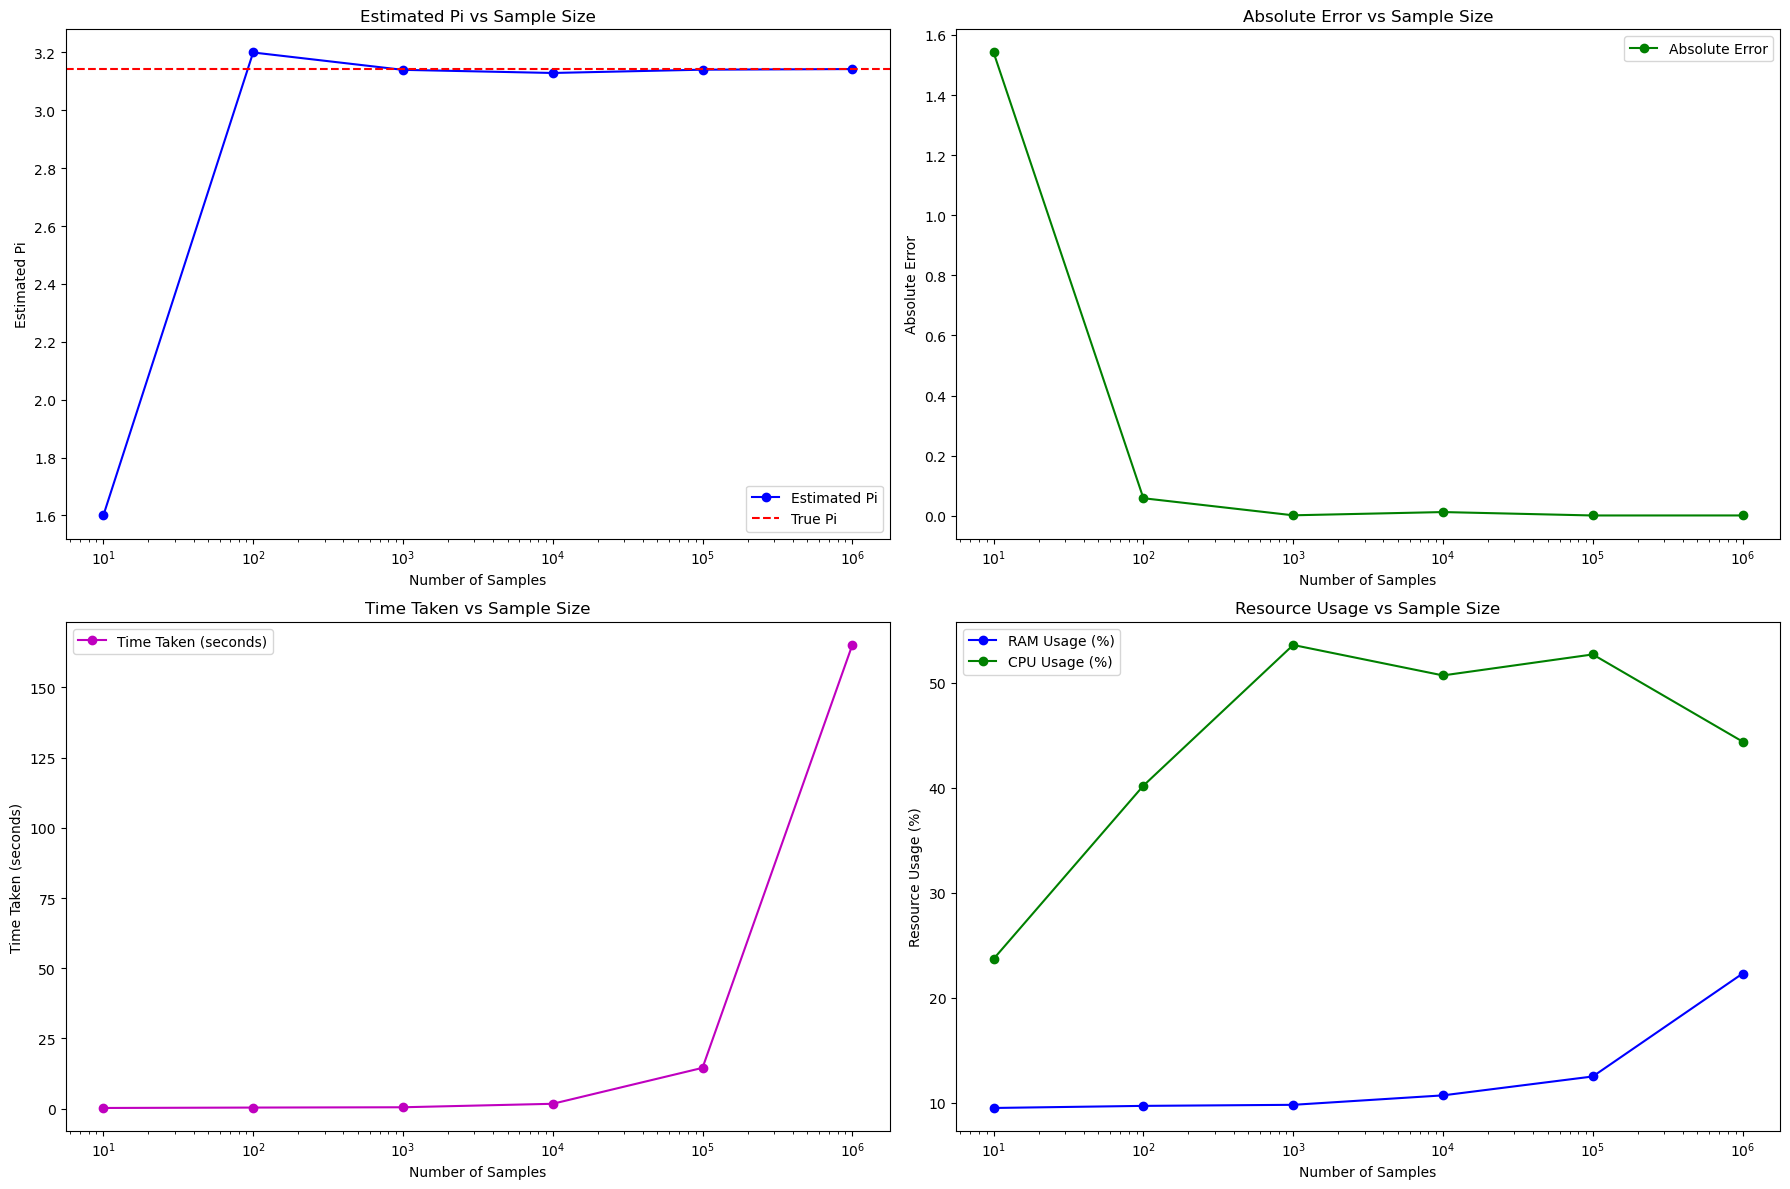

In [3]:
# pip install ray
import ray
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Initialize Ray
ray.init()

# Function to check if a point is inside the unit circle
@ray.remote
def is_point_inside_unit_circle():
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    # Submit tasks to Ray workers
    futures = [is_point_inside_unit_circle.remote() for _ in range(num_samples)]
    
    # Count the number of points inside the circle
    count_inside_circle = sum(ray.get(futures))
    
    # Estimate Pi
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    sample_sizes = [10, 100,1000, 10000, 100000, 1000000]

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========RAY========")
    # Perform Monte Carlo simulation for different sample sizes
    for num_samples in sample_sizes:
        # Execute Monte Carlo simulation using Ray
        result = monte_carlo_simulation(num_samples)
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Shutdown Ray
    ray.shutdown()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [4]:
print('over')

over
